In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing Necessary Library

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

Loading Data

In [41]:
data = pd.read_csv('/content/drive/MyDrive/Oasis Infobyte/Car Price prediction/car data.csv')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Data Exploration

In [42]:
data.shape

(301, 9)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [44]:
print("Data types of Data:")
print(data.dtypes)

Data types of Data:
Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object


In [45]:
print("Missing values in Data:")
data.isnull().sum()

Missing values in Data:


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [46]:
print("Show duplicates in data:")
data.duplicated().sum()

Show duplicates in data:


2

In [47]:
data = data.drop_duplicates()
data.duplicated().sum()

0

In [48]:
brands = data.groupby("Car_Name")["Selling_Price"].mean().sort_values(ascending = False)

Visualizing Data

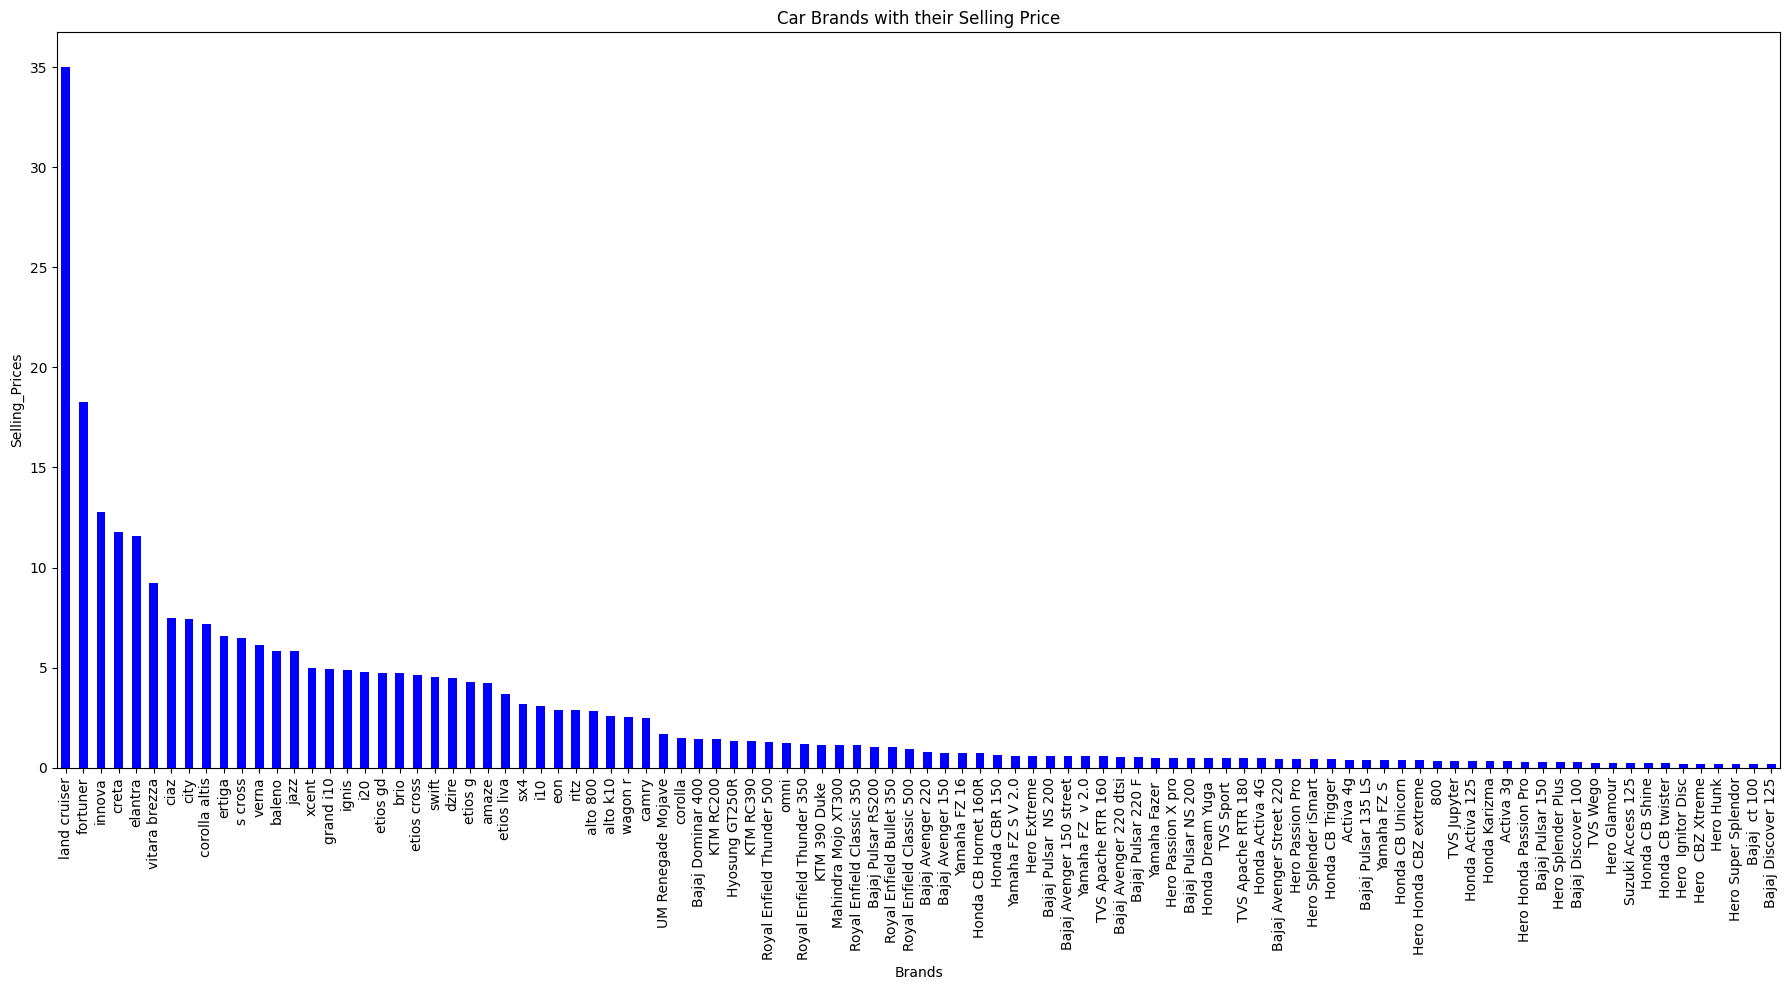

In [49]:
plt.figure(figsize = (18,10))
brands.plot(kind = "bar", color = "blue")
plt.title("Car Brands with their Selling Price")
plt.xlabel("Brands")
plt.ylabel("Selling_Prices")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

Data Encoding

In [50]:
print(data["Fuel_Type"].value_counts())

Fuel_Type
Petrol    239
Diesel     58
CNG         2
Name: count, dtype: int64


In [51]:
print(data["Selling_type"].value_counts())

Selling_type
Dealer        193
Individual    106
Name: count, dtype: int64


In [52]:
print(data["Transmission"].value_counts())

Transmission
Manual       260
Automatic     39
Name: count, dtype: int64


In [53]:
data.replace({"Fuel_Type":{"Petrol":0,"Diesel":1,"CNG":2}},inplace = True)

In [54]:
data.replace({"Selling_type":{"Dealer":0,"Individual":1}},inplace = True)

In [55]:
data.replace({"Transmission":{"Manual":0,"Automatic":1}},inplace = True)

Data Splitting

In [56]:
X = data.drop(columns = ["Car_Name","Selling_Price"])
X

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [57]:
y = data["Selling_Price"]
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64

In [61]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Model Building & Training

In [62]:
model = LinearRegression()

In [63]:
model.fit(X_train,y_train)

LinearRegression()

Results

In [65]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared Error:", mse)
print("R-Squared:",r2)

Mean squared Error: 6.675444100493416
Root Mean Square: 0.7409934356413092


In [68]:
import pickle

with open("Task-2.pkl","wb") as file:
  pickle.dump(model, file)

In [72]:
new_car = [[2012, 15000, 1, 0, 1, 1, 0]]
predicted_price = model.predict(new_car)
print('Predicted Selling Price:', predicted_price[0])

Predicted Selling Price: 6620.153537729867
